In [1]:
import pandas as pd
import numpy as np

In [2]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from xgboost import XGBClassifier
from xgboost import plot_importance 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv('C:/Users/doong/Desktop/PythonWorkspace/창종설/boho_final(클러스터링_final).csv')

In [4]:
df["cluster_label"].value_counts()

0    35584
2      644
1       12
Name: cluster_label, dtype: int64

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
features = df.columns

X = df[features].drop(["시설명","시간대구분","주소",'시설종류','구역지정수','CCTV 수', '도로표지판 수', '과속방지턱 수',
                               "위도","경도",'보호구역도로폭',"tmp","도로명","행정동","시군구명","총생활인구수","사망자수",
                              "중상자수","경상자수","부상신고자수",'가해운전자 차종','피해운전자 차종','피해운전자 연령',
                               "사고 수","통행량 도로명","통행량",'속도','면적','인구밀도',"위험도","cluster_label",
                              "위험도군집"], axis=1)
y = df["cluster_label"] 
X = pd.get_dummies(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=240)

In [8]:
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [9]:
# from imblearn.over_sampling import ADASYN
# #Oversampling the data
# adasyn = ADASYN(random_state = 101)
# X_train, y_train = adasyn.fit_resample(X_train, y_train)

In [10]:
y_train.value_counts()

0    24913
1    24913
2    24913
Name: cluster_label, dtype: int64

In [11]:
X.columns

Index(['CCTV설치여부', '일출/일몰', '등하교시간', '점심시간', '가해차종엔진125cc이상', '피해자어린이유무',
       '피해자교통수단탑승유무', '보호구역초등학교여부', '활동시간', '1차선이하', '표지판8개이하', '방지턱43개이하',
       '구역지정2개이하', 'CCTV3개이하', '피해자초고령여부', '가해차종4륜유무', '피해자연령38세이하',
       '피해차량승합차량여부', '일방통행여부', '방지턱16개이하', 'CCTV10개이하', '초등학교셔틀버스운영여부'],
      dtype='object')

In [12]:
model = XGBClassifier()
model.fit(X=X_train,y = y_train)
model

[21:27:47] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [13]:
fscore = model.get_booster().get_fscore()
y_pred = model.predict(X_test) # 예측치
y_true = y_test 
accuracy_score(y_true, y_pred)

0.9817880794701986

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

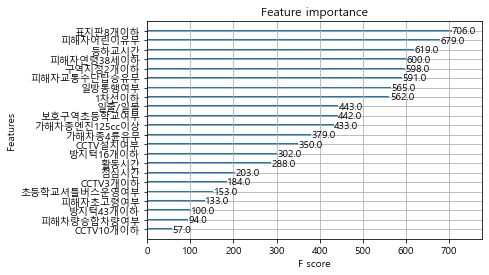

In [14]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns
%matplotlib inline

plot_importance(model)

In [15]:
y_pred = model.predict(X_test) # 예측치
y_true = y_test # 정답

print("정확도 :",accuracy_score(y_true, y_pred))

정확도 : 0.9817880794701986


In [16]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10512     3   156]
 [    0     1     3]
 [   33     3   161]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     10671
           1       0.14      0.25      0.18         4
           2       0.50      0.82      0.62       197

    accuracy                           0.98     10872
   macro avg       0.55      0.68      0.60     10872
weighted avg       0.99      0.98      0.98     10872



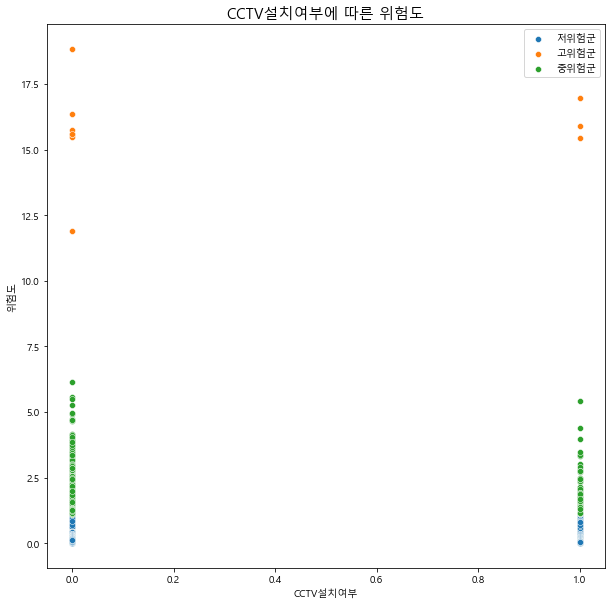

count    5928.000000
mean        0.299946
std         0.474418
min         0.000000
25%         0.140667
50%         0.226083
75%         0.339756
max        16.956347
Name: 위험도, dtype: float64

In [17]:
input_x="CCTV설치여부"
input_y="위험도"

plt.figure(figsize=(10,10))
sns.scatterplot(data=df[df['cluster_label']==0], x=input_x, y=input_y, ci=None, label='저위험군')
sns.scatterplot(data=df[df['cluster_label']==1], x=input_x, y=input_y, ci=None, label='고위험군')
sns.scatterplot(data=df[df['cluster_label']==2], x=input_x, y=input_y, ci=None, label='중위험군')
#sns.scatterplot(data=boho_final[boho_final['cluster_label']==3], x=input_x, y=input_y, ci=None, label='저위험군')
#sns.scatterplot(data=boho_final[boho_final['cluster_label']==4], x=input_x, y=input_y, ci=None, label='저위험군')
plt.title(f"{input_x}에 따른 위험도", fontdict={'fontsize':15})
plt.legend()
plt.show()

df[df[input_x]==0]["위험도"].describe()

df[df[input_x]==1]["위험도"].describe()

In [25]:
df_predict = pd.read_csv('C:/Users/doong/Desktop/PythonWorkspace/창종설/df_new.csv')

In [26]:
X_new = df_predict[features].drop(["시설명","시간대구분","주소",'시설종류','구역지정수','CCTV 수', '도로표지판 수', '과속방지턱 수',
                               "위도","경도",'보호구역도로폭',"tmp","도로명","행정동","시군구명","총생활인구수","사망자수",
                              "중상자수","경상자수","부상신고자수",'가해운전자 차종','피해운전자 차종','피해운전자 연령',
                               "사고 수","통행량 도로명","통행량",'속도','면적','인구밀도',"위험도","cluster_label",
                              "위험도군집"], axis=1)

In [27]:
predict = model.predict(X_new)

In [28]:
X_new["개선 후"] = 0
for i,p in enumerate(predict):
    X_new.loc[i,"개선 후"] = p

In [29]:
X_new["개선 후"].value_counts()

1    6
2    6
Name: 개선 후, dtype: int64